<a href="https://colab.research.google.com/github/temesgen5335/Logistic-optimization/blob/featur_engineering/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data for this exploration


There are two datasets available for this project.The first one is the table that contains information about the completed orders
 ####  completed orders that has the following columns      
---  ------            --------------   -----
 0   Trip ID                
 1   Trip Origin         
 2   Trip Destination  
 3   Trip Start Time    
 4   Trip End Time    

 The second one is the table that contains delivery requests by clients
 ####  Columns       
---  ------          
 0   id                      
 1   order_id        
 2   driver_id           
 3   driver_action  
 4   lat                    
 5   lng                    
 6   created_at    
 7   updated_at   


## Prerequisites

In [135]:
'''import datashader as ds, pandas as pd, colorcet
import datashader.transfer_functions as tf

import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')'''

"import datashader as ds, pandas as pd, colorcet\nimport datashader.transfer_functions as tf\n\nimport holoviews as hv, pandas as pd, colorcet as cc\nfrom holoviews.element.tiles import EsriImagery\nfrom holoviews.operation.datashader import datashade\nhv.extension('bokeh')"

In [136]:
'''from google.colab import drive
drive.mount('/content/drive')
'''

"from google.colab import drive\ndrive.mount('/content/drive')\n"

## Loading Data

In [21]:

import pandas as pd
import os
#os.listdir('/content/drive/My Drive')

os.chdir("/home/tema/10X/Week8/Logistic optimization/data")

os.getcwd()


'/home/tema/10X/Week8/Logistic optimization/data'

In [22]:
delivery_orders_raw = pd.read_csv('driver_locations_during_request.csv')
completed_orders_raw = pd.read_csv('nb.csv')

### driver location during requests

In [23]:
delivery_orders_raw


,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,NaN,NaN
1557736,1557737,517948,245447,rejected,6.425431,3.527358,NaN,NaN
1557737,1557738,517948,239866,rejected,6.440013,3.525378,NaN,NaN
1557738,1557739,517948,243774,rejected,6.469036,3.566877,NaN,NaN


In [24]:
delivery_orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


### Trip data

In [25]:
completed_orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [26]:
# droping the unnamed value
if 'Unnamed: 32' in delivery_orders_raw.columns:
  delivery_orders_raw = delivery_orders_raw.drop('Unnamed: 32', axis=1)

if 'Unnamed: 32' in completed_orders_raw.columns:
  completed_orders_raw = completed_orders_raw.drop('Unnamed: 32', axis=1)


#delivery_orders.head()


## Data overview Info

In [143]:
delivery_orders_raw

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,NaN,NaN
1557736,1557737,517948,245447,rejected,6.425431,3.527358,NaN,NaN
1557737,1557738,517948,239866,rejected,6.440013,3.525378,NaN,NaN
1557738,1557739,517948,243774,rejected,6.469036,3.566877,NaN,NaN


In [4]:
# Check for null values in all columns
if delivery_orders_raw.isnull().any().any():
    print("DataFrame has null values.")
else:
    print("DataFrame does not have null values.")


DataFrame has null values.


In [5]:
if delivery_orders_raw['driver_action'].isnull().any():
    print("Column 'driver_action' has null values.")
else:
    print("Column 'driver_action' does not have null values.")


Column 'order_id' does not have null values.


In [146]:
completed_orders_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [147]:
# percentage of rejected orders
delivery_orders_raw['driver_action'].describe()['freq'] * 100 /delivery_orders_raw.shape[0]

98.33714227021197

In [6]:
# Filter for rows where driver_action is 'accepted'
accepted_orders = delivery_orders_raw[delivery_orders_raw['driver_action'] == 'accepted']

# Count the number of unique order IDs
num_accepted_orders = accepted_orders['order_id'].nunique()

# Print the number of accepted orders
print("Number of accepted orders:", num_accepted_orders)


Number of accepted orders: 25881


**Data overview**


Completed Orders: Total Entries: 536,020

Delivery Requests  Total Entries: 1,557,740

The number of accepted orders are: 25881


**Basic Statistics**

In [150]:
print (completed_orders_raw.describe())


            Trip ID
count  5.360200e+05
mean   9.910221e+05
std    3.456364e+05
min    3.919960e+05
25%    6.935610e+05
50%    9.910085e+05
75%    1.281570e+06
max    1.637709e+06


## Handling Missing values and Outliers

In [27]:
# Drop rows where Trip Start Time or Trip End Time are missing
completed_orders = completed_orders_raw.dropna(subset=['Trip Start Time', 'Trip End Time'])

# Display the number of rows before and after dropping missing values
null_values = len(completed_orders_raw)- len(completed_orders)

null_values
print ('The number of rows that are missing are:', null_values)

The number of rows that are missing are: 1652


In [42]:
completed_orders.dtypes

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
dtype: object

In [43]:
completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])


/tmp/ipykernel_875844/1480066296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
/tmp/ipykernel_875844/1480066296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])


In [44]:
# Check for null values in all columns
if completed_orders.isnull().any().any():
    print("DataFrame has null values.")
else:
    print("DataFrame does not have null values.")

DataFrame does not have null values.


### cleaning driver location  data

In [30]:
delivery_orders = delivery_orders_raw.dropna(subset= ['driver_action'])
delivery_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [31]:
# Check for null values in each column
null_columns = delivery_orders_raw.columns[delivery_orders_raw.isnull().any()]

null_columns


Index(['created_at', 'updated_at'], dtype='object')

In [32]:
# Drop columns with null values
delivery_orders = delivery_orders_raw.drop(null_columns, axis=1)

# Print the DataFrame after dropping columns
delivery_orders.head()

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800


In [37]:
# Define time range for the data
start_date = completed_orders['Trip Start Time'].min().to_pydatetime()
# decrease one day from the start date
start_date = start_date - pd.Timedelta(days=1)
end_date = completed_orders['Trip Start Time'].max().to_pydatetime()

AttributeError: 'str' object has no attribute 'to_pydatetime'

# Exploring the datas

In [33]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import haversine as hs
from datetime import datetime

### Compute distances and speeds for completed orders

In [185]:
completed_orders

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Geodesic Distance (m)
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,1.550000,6.508813,3.377403,6.650970,3.345031,16123.451077
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,29.400000,6.431671,3.455538,6.428081,3.472189,1884.305061
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,41.350000,6.631679,3.338898,6.508324,3.359040,13822.392617
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,13.583333,6.572757,3.367708,6.584881,3.361407,1511.034180
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615,20984.319062
...,...,...,...,...,...,...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,27.883333,6.448218,3.477208,6.437787,3.481670,1254.752111
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,55.600000,6.442321,3.473687,6.436589,3.555974,9124.781484
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,49.783333,6.428198,3.492248,6.448089,3.477575,2733.703826
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,19.633333,6.586930,3.363297,6.637907,3.333951,6504.795998


In [18]:
from datetime import datetime

# Convert Trip Start Time and Trip End Time to datetime
completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])

completed_orders[['Trip Start Time', 'Trip End Time']]

/tmp/ipykernel_875844/2293525678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
/tmp/ipykernel_875844/2293525678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])


,Trip Start Time,Trip End Time
0,2021-07-01 07:28:04,2021-07-01 07:29:37
1,2021-07-01 06:38:04,2021-07-01 07:07:28
2,2021-07-01 06:21:02,2021-07-01 07:02:23
3,2021-07-01 07:16:07,2021-07-01 07:29:42
4,2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...
536015,2021-12-30 20:35:06,2021-12-30 21:02:59
536016,2021-12-30 20:48:13,2021-12-30 21:43:49
536017,2021-12-30 20:51:45,2021-12-30 21:41:32
536018,2021-12-30 20:48:50,2021-12-30 21:08:28


In [19]:
completed_orders[['Trip Start Time', 'Trip End Time']].isna().sum()

Trip Start Time    0
Trip End Time      0
dtype: int64

In [160]:
# Calculate trip duration in minutes
completed_orders.loc[:, 'Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time'])

# Convert trip duration to minutes
completed_orders.loc[:, 'Trip Duration'] = completed_orders['Trip Duration'].dt.total_seconds() / 60
completed_orders['Trip Duration']

/tmp/ipykernel_770149/1444449948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders.loc[:, 'Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time'])
/tmp/ipykernel_770149/1444449948.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.55       29.4        41.35       ... 49.78333333 19.63333333
 89.36666667]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  completed_orders.loc[:, 'Trip Duration'] = completed_orders['Trip Duration'].dt.total_seconds() / 60


0          1.550000
1         29.400000
2         41.350000
3         13.583333
4          3.616667
            ...    
536015    27.883333
536016    55.600000
536017    49.783333
536018    19.633333
536019    89.366667
Name: Trip Duration, Length: 534368, dtype: float64

In [161]:
# Create a new dataframe with Trip ID and Trip Duration (seconds)
trip_duration = completed_orders[['Trip ID', 'Trip Duration']].copy()

trip_duration[['Trip ID', 'Trip Duration']]


,Trip ID,Trip Duration
0,391996,1.550000
1,391997,29.400000
2,391998,41.350000
3,391999,13.583333
4,392001,3.616667
...,...,...
536015,1637696,27.883333
536016,1637702,55.600000
536017,1637704,49.783333
536018,1637705,19.633333


In [162]:

completed_orders[['Trip Origin', 'Trip Destination']]

,Trip Origin,Trip Destination
0,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307"
1,"6.4316714,3.4555375","6.4280814653326,3.4721885847586"
2,"6.631679399999999,3.3388976","6.508324099999999,3.3590397"
3,"6.572757200000001,3.3677082","6.584881099999999,3.3614073"
4,"6.6010417,3.2766339","6.4501069,3.3916154"
...,...,...
536015,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999"
536016,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835"
536017,"6.4281982,3.492248","6.448088500000001,3.4775747"
536018,"6.5869296,3.3632966","6.637906899999999,3.3339515"


In [163]:
# Split Trip Origin and Trip Destination into Latitude and Longitude
completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
completed_orders[['Destination Latitude', 'Destination Longitude']] = completed_orders['Trip Destination'].str.split(',', expand=True)

completed_orders[['Origin Latitude', 'Origin Longitude']]

/tmp/ipykernel_770149/2986953114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
/tmp/ipykernel_770149/2986953114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders[['Origin Latitude', 'Origin Longitude']] = completed_orders['Trip Origin'].str.split(',', expand=True)
/tmp/ipykernel_770149/2986953114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Origin Latitude,Origin Longitude
0,6.508813001668548,3.37740316890347
1,6.4316714,3.4555375
2,6.631679399999999,3.3388976
3,6.572757200000001,3.3677082
4,6.6010417,3.2766339
...,...,...
536015,6.448218499999999,3.4772075
536016,6.442320899999999,3.4736868
536017,6.4281982,3.492248
536018,6.5869296,3.3632966


In [164]:
completed_orders[['Destination Latitude', 'Destination Longitude']].isna().sum()

Destination Latitude     0
Destination Longitude    0
dtype: int64

In [165]:
# Add Trip ID column
completed_orders['Trip ID'] = completed_orders['Trip ID']

completed_orders[['Trip ID', 'Origin Latitude', 'Origin Longitude']]


/tmp/ipykernel_770149/2799121290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Trip ID'] = completed_orders['Trip ID']


,Trip ID,Origin Latitude,Origin Longitude
0,391996,6.508813001668548,3.37740316890347
1,391997,6.4316714,3.4555375
2,391998,6.631679399999999,3.3388976
3,391999,6.572757200000001,3.3677082
4,392001,6.6010417,3.2766339
...,...,...,...
536015,1637696,6.448218499999999,3.4772075
536016,1637702,6.442320899999999,3.4736868
536017,1637704,6.4281982,3.492248
536018,1637705,6.5869296,3.3632966


In [166]:
# Convert Latitude and Longitude to float
completed_orders['Origin Latitude'] = completed_orders['Origin Latitude'].astype(float)
completed_orders['Origin Longitude'] = completed_orders['Origin Longitude'].astype(float)
completed_orders['Destination Latitude'] = completed_orders['Destination Latitude'].astype(float)
completed_orders['Destination Longitude'] = completed_orders['Destination Longitude'].astype(float)

#completed_orders['Destination Longitude']
trip_location = completed_orders[['Trip ID', 'Destination Longitude', 'Origin Longitude', 'Destination Latitude', 'Destination Longitude']]
trip_location

/tmp/ipykernel_770149/3246493596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Origin Latitude'] = completed_orders['Origin Latitude'].astype(float)
/tmp/ipykernel_770149/3246493596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Origin Longitude'] = completed_orders['Origin Longitude'].astype(float)
/tmp/ipykernel_770149/3246493596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Trip ID,Destination Longitude,Origin Longitude,Destination Latitude,Destination Longitude
0,391996,3.345031,3.377403,6.650970,3.345031
1,391997,3.472189,3.455538,6.428081,3.472189
2,391998,3.359040,3.338898,6.508324,3.359040
3,391999,3.361407,3.367708,6.584881,3.361407
4,392001,3.391615,3.276634,6.450107,3.391615
...,...,...,...,...,...
536015,1637696,3.481670,3.477208,6.437787,3.481670
536016,1637702,3.555974,3.473687,6.436589,3.555974
536017,1637704,3.477575,3.492248,6.448089,3.477575
536018,1637705,3.333951,3.363297,6.637907,3.333951


### merging the two data sets for further exploration

In [167]:
# Merge the datasets on the relevant columns
merged_df = pd.merge(delivery_orders, completed_orders, left_on='order_id', right_on='Trip ID', how='inner')
merged_df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Duration,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615


In [168]:
merged_df.drop(columns=['Trip Origin', 'Trip Destination'], inplace=True)
merged_df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Start Time,Trip End Time,Trip Duration,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude
0,1,392001,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
1,2,392001,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
2,3,392001,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
3,4,392001,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615
4,5,392001,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,6.601042,3.276634,6.450107,3.391615


To find out how many times each drivers rejected a trip

In [169]:
# Count the number of rejections per driver
rejections = merged_df[merged_df['driver_action'] == 'rejected']
rejections_per_driver = rejections['driver_id'].value_counts()

# Display the results
rejections_per_driver.head(), rejections_per_driver.tail()

(driver_id
 245538    6931
 243020    6447
 242971    6231
 243676    5841
 243932    5778
 Name: count, dtype: int64,
 driver_id
 245840    1
 247182    1
 246602    1
 246082    1
 245907    1
 Name: count, dtype: int64)

### Computes shortest distance, driving route distance, and other key variables between two geographic coordinates defined in longitude and latitude and two timestamps.

In [175]:

# Helper function to compute geodesic distance
def compute_geodesic_distance(coord1, coord2):
    return geodesic(coord1, coord2).meters

# Helper function to compute haversine distance
def compute_haversine_distance(coord1, coord2):
    return hs.haversine(coord1, coord2) * 1000  # Convert to meters



In [176]:
# Helper function to compute speed
def compute_speed(distance, start_time, end_time):
    time_diff = (end_time - start_time).total_seconds() / 3600.0  # in hours
    if time_diff == 0:
        return 0
    return distance / time_diff

In [187]:
completed_orders['Geodesic Distance (m)'] = completed_orders.apply(lambda row: compute_geodesic_distance(row['Trip Origin'], row['Trip Destination']), axis=1)


/tmp/ipykernel_770149/3217277741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_orders['Geodesic Distance (m)'] = completed_orders.apply(lambda row: compute_geodesic_distance(row['Trip Origin'], row['Trip Destination']), axis=1)


In [ ]:
completed_orders['Haversine Distance (m)'] = completed_orders.apply(lambda row: compute_haversine_distance(row['Trip Origin'], row['Trip Destination']), axis=1)


In [ ]:
completed_orders['Speed (m/s)'] = completed_orders.apply(lambda row: compute_speed(row['Geodesic Distance (m)'], row['Trip Start Time'], row['Trip End Time']), axis=1)

### Compute number of riders and orders within 500m circles

In [188]:
# Compute number of riders and orders within 500m circles
def count_within_radius(df, origin, radius=500):
    origin_coords = tuple(map(float, origin.split(',')))
    return df.apply(lambda row: compute_haversine_distance(origin_coords, (row['lat'], row['lng'])) <= radius, axis=1).sum()

In [ ]:
accepted_orders = delivery_orders[delivery_orders['driver_action'] == 'accepted']
unfulfilled_orders = delivery_orders[delivery_orders['driver_action'] != 'accepted']

In [ ]:
completed_orders['Accepted Riders within 500m'] = completed_orders['Trip Origin'].apply(lambda x: count_within_radius(accepted_orders, ','.join(map(str, x))))
completed_orders['Unfulfilled Orders within 500m'] = completed_orders['Trip Origin'].apply(lambda x: count_within_radius(unfulfilled_orders, ','.join(map(str, x))))

# Data Visualization

In [180]:
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

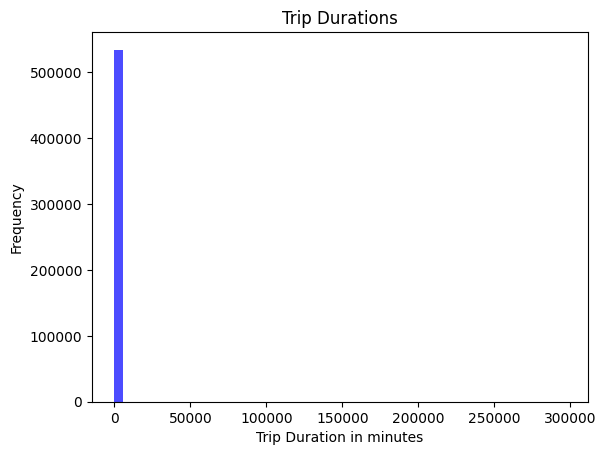

In [181]:
# Histogram of trip durations
#plt.figure(figsize=(10, 6))
plt.hist(completed_orders['Trip Duration'], bins=50, alpha=0.7, color='blue')
plt.title('Trip Durations')
plt.xlabel('Trip Duration in minutes')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_770149/1902983383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rejections_per_driver.index, y=top_rejections_per_driver.values, palette='viridis')


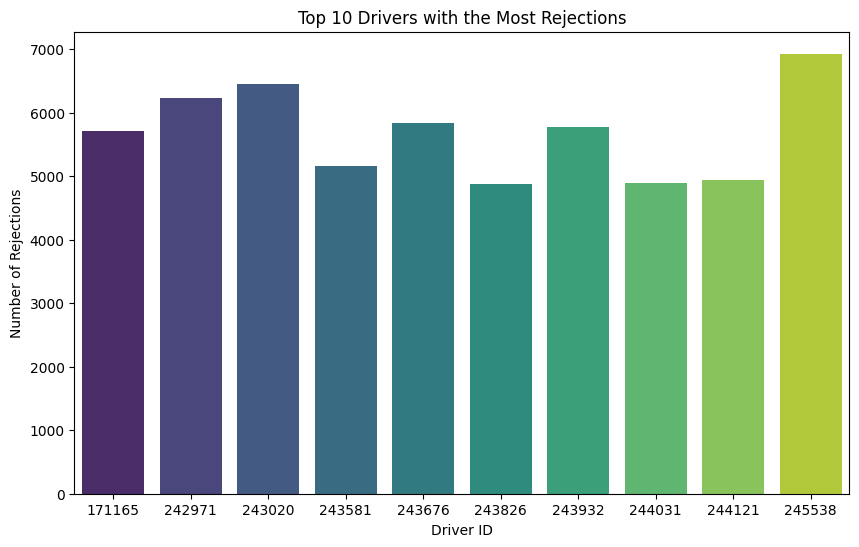

In [182]:

# Plot the top 10 drivers with the most rejections
top_rejections_per_driver = rejections_per_driver.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rejections_per_driver.index, y=top_rejections_per_driver.values, palette='viridis')
plt.xlabel('Driver ID')
plt.ylabel('Number of Rejections')
plt.title('Top 10 Drivers with the Most Rejections')
plt.show()

/home/tema/10X/Week8/Logistic optimization/Lenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


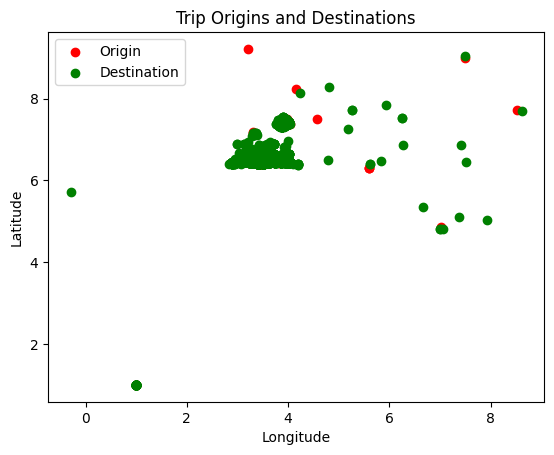

In [183]:
# Scatter plot of trip origins and destinations
plt.scatter(completed_orders['Origin Longitude'], completed_orders['Origin Latitude'], color='red', label='Origin')
plt.scatter(completed_orders['Destination Longitude'], completed_orders['Destination Latitude'], color='green', label='Destination')
plt.title('Trip Origins and Destinations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Saving insights to a csv file

In [36]:
completed_orders

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [35]:
file_path = "/home/tema/10X/Week8/Logistic optimization/data/merged.csv"
file_path_co ='/home/tema/10X/Week8/Logistic optimization/data/completed_orders.csv'
file_path_do ='/home/tema/10X/Week8/Logistic optimization/data/drivers_location.csv'

#completed_orders.to_csv(file_path_co, index=False)
#merged_df.to_csv(file_path, index = False)
delivery_orders.to_csv(file_path_do, index = False)